## <p style="text-align: right;"> &#9989; Lukas Nolta</p>

## <p style="text-align: right;"> &#9989; noltaluk</p>

# Homework Assignment #4 (Individual)
## Locate earthquakes: forward and inverse problems

Assignment instructions

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

There are 25 points possible on this assignment. Point values for each part are included in the section headers.

This assignment is due at 11:59 pm on Friday, November 1st. It should be uploaded into the "Homework Assignments" submission folder for Homework #4. Submission instructions can be found at the end of the notebook.

## Background

The teconic plates are slowly moving beneath us at a rate of just a few millimetres per year. With time, as the tectonic plate deforms, the stress is built up and the stored energy is accumulated within the rock of the moving plate. When the stress exceeds the strength of the rock, the rock fractures, often at an existing weak zone (i.e., a fault) within the rock. The sudden release of the stored energy is manifested as an earthquake! This energy release results in seismic waves traveling through the rocks.

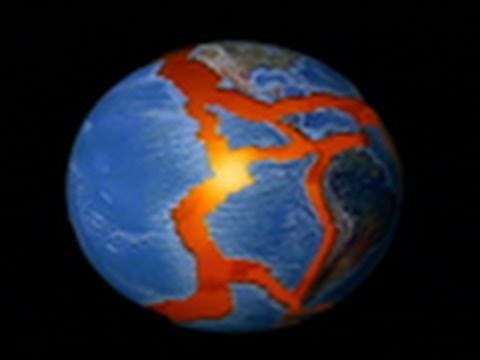

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("VSgB1IWr6O4",width=480,height=270)

The primary tool seismologists use to locate each earthquake is a network of seismometers. Seismometers are instruments designed to be sensitive enough to feel even the smallest motion of the waves coming from distant locations on Earth. P waves, or primary waves, have the greatest wave speed, and will reach a seismometer first. S waves, or secondary waves, move slower and are observed after the P waves. Seismometers record the times when the first (P waves) and second (S waves) seismic waves arrive. When the differential travel times between P wave and S wave are measured on the seismograms from at least three locations, the epicenter location of the earthquake can be determined.

<img src=https://i.imgur.com/eYngZVQ.png width="400px">

### Goals for this assignment:
* Practice setting up a GitHub repository, committing and pushing repository changes.
* Solve the forward problem: Calculate the differential travel times between P wave and S wave at different seismic station locations.
* Apply trigonometry in seismology to triangulate approximate earthquake epicenter location.
* Solve the inverse problem: Locate the earthquake epicenter with given P and S travel times at three different seismic station locations.

**You are encouraged to read through the entire assignment before you start to make sure you understand what you're expected to do.**


### Assignment instructions

**This assignment is due at 11:59 pm on Friday, November 1st.** It should be uploaded into the "Homework Assignments" submission folder for Homework #4.  Submission instructions can be found at the end of the notebook.

**Important note**: Your notebook will be graded by restarting the kernel and running all of the cells (Kernel > Restart and Run All). If any of the cells throw an error, it may not be possible to properly grade those cells. Make sure that you test your notebook before submitting it to ensure that you receive the maxmimum number of points possible!

### Grading

* Part 1: Add to your Git repository to track your progress on your assignment (3 pts)
* Part 2: Calculate the S-P differential travel times with given earthquake and station locations (2 pts)
* Part 3: Triangulate earthquake epicenter (5 pts)
* Part 4: Locate earthquake based on grid search (5 pts) and Monte-Carlo method (5 pts).

Total points: **20** 

---
## Part 1: Add to your Git repository to track your progress on your assignment (3 points)

For this assignment, you're going to add it to the `cmse202-f19-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to:

1. Navigate to your `cmse202-f19-turnin` repository and create a new directory called `hw-04`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
1. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Make sure you've added your Professor and your TA as collaborators to your "turnin" respository with "Read" access so that we can see your assignment.

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-f19-turnin`" repository inside the `hw-04` directory that you just created.  Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.

**Do this**: Before you move on, put the command that your instructor should run to clone your repository in the empty cell below.

---
## Part 2: Forward problem: observations of the S-P differential travel times with given earthquake and station locations (2 pts)

In this assignment, we simplify the forward modeling of the differential travel time of P wave and S wave by assuming constant ${V_p}$ and ${V_s}$, the seismic wave speeds of P and S waves respectively. Assuming that we have a small seismic network of three stations on a two-dimensional plane in Euclidean coordinates x and y. The observations $\mathbf{\delta t}^{obs}$ = {$\delta t_1,\delta t_2,\delta t_3$} are the differential travel times of P and S waves measured at three stations. 

The S-P differential travel time at Station $i$ can be caculated with the equation below:

\begin{equation*}
{\delta t}_i = \dfrac{r_{i}}{V_s} - \dfrac{r_{i}}{V_p},      
\quad\quad \text{Equation (1)}
\end{equation*}

in which $r_{i} = \sqrt{(x_i - x_s)^2 + (y_i - y_s)^2}$ , the distance between Station $i$ located at $(x_i,y_i)$ and the earthquake epicenter at $(x_s,y_s)$, which is also called the epicentral distance of Station $i$. In this simplied forward problem, the model parameters are the x and y coordinates of the earthquake epicenter, $x_s$ and $y_s$, which can be used to forward model and predict the observations $\mathbf{\delta t}_{obs}$.

Let's assume that the earthquake epicenter is located at $(x_s,y_s) = (30,50)$. The unit of the coordinates are in kilometers. Let's also assume $V_p  = 5.5 $ km/s and $V_s  = 3.2 $ km/s, the typical P and S wave speeds in the upper crust. You can then use equation (1) to calculated the S-P differential travel time recorded at any given location (x,y) where a station is located.

### Part 2.1: Code a function that can caculate the S-P differential travel time at any location with the given earthquake location, and the P and S wave speeds. (1 pts)

You can test your function with a station located at $(x,y) = (100, 0)$, the results should be about 11.242 seconds.

In [2]:
# Put your code here
def sandp(x_i,y_i,xe,ye):
    "The goal of this function is to calculate the S-P differential travel time at any location with the"
    'given earthquake location, and the P and S wave speeds'
    r = (((x_i - xe)**2) + (y_i - ye)**2)**(1/2) #determine the r value
    travel_time = (r/3.2)-(r/5.5)  # determine the travel time
    return travel_time # return desired value
    
sandp(100,0,30,50)    

11.24167506488525

### Part 2.2:  Calculate the S-P differential times at three stations. (1 pts)

Let's assume that three sations are located at $(x_1,y_1) = (50, 70)$, $(x_2,y_2) = (25, 25)$, and $(x_3,y_3) = (10, 75)$, calculate and print out the S-P differential travel times at each station. Please round the values of the differential travel times to three decimal places.

In [3]:
# Put your code here
a = sandp(50,70,30,50)
b = sandp(25,25,30,50)
c = sandp(10,75,30,50)
print(round(a,3),round(b,3),round(c,3))

3.696 3.332 4.184


---
## Part 3:  Earthquake epicenter triangulation (5 pts)

Here is a video that briefly introduces how earthquake epicenter triangulation works.

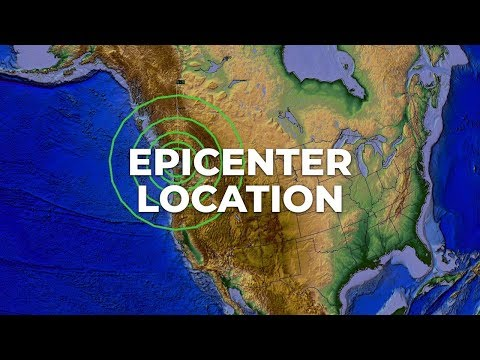

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo("oBS7BKqHRhs",width=640,height=360)

### Part 3.1: Code a function that can caculate the epicentral distance, i.e., the distance between any given pair of earthquake and station locations, from the S-P differential travel time measured at the station, assuming the P and S wave speeds are known.  (1 pts)

Let's still assume $V_p  = 5.5 $ km/s and $V_s  = 3.2 $ km/s. Please note that the earthquake location is unknown, but the S-P differential travel time is known.

In [5]:
# Put your code here
def epicentral(tt):
    r = tt/((1/3.2)-(1/5.5))
    return r
    
epicentral(3.922)    
    

30.011826086956525

### Part 3.2: Calculate the epicentral distances based on the S-P differential travel times measured from three stations at different locations that recorded the same earthquake.  (0.5 pts)

We have a small array of three seismic stations with the station coordinates and the measured  S-P differential travel time listed below:

Station 1: $(x_1,y_1) = (5, 10);     {\delta t}_1 = 3.922 $ seconds 

Station 2: $(x_2,y_2) = (15, 45);     {\delta t}_2 = 3.272 $ seconds 

Station 3: $(x_3,y_3) = (60, 30);     {\delta t}_3 = 3.874 $ seconds 

Please use the function coded in Part 3.2 to calculate and print out the epicentral distance of each station. Please round the values of the epicentral distances to three decimal places.

In [6]:
# Put your code here
a1 = epicentral(3.922)
b1 = epicentral(3.272)
c1 = epicentral(3.874)
print(round(a1,3),round(b1,3),round(c1,3))

30.012 25.038 29.645


The epicentral distance at any station tells you the information of how far the earthquake is away from the station, but it doesn't tell you which direction the seismic waves are originated from. However, with the epicentral distance known from at least three stations, the earthquake epicenter can be triangulated. 

### Part 3.3: Define a function that plots a red triangle at any given station location and draws a circle in red line with the station as the center and a radius equal to the station's epicentral distance. (2 pts)

In [7]:
# Put your code here
import matplotlib.pyplot as plt
import numpy as np

def plot(t1,t2,t3):
    plt.figure(figsize = (10,10))
    circle1 = plt.Circle((5,10),t1, color = 'r', fill = False, linewidth = 3)
    circle2 = plt.Circle((15,45),t2,  color = 'r', fill = False, linewidth = 3)
    circle3 = plt.Circle((60,30),t3,  color = 'r', fill = False, linewidth = 3)
    
    ax = plt.gca()
    ax.cla()
    plt.gca().set_aspect('equal')
    
    ax.set_xlim((-50,100))
    ax.set_ylim((-50,100))
    
    ax.plot((5),(10), '^', color = 'r')
    ax.plot((15),(45),'^', color = 'r')
    ax.plot((60),(30),'^', color = 'r')
    
    ax.add_artist(circle1)
    ax.add_artist(circle2)
    ax.add_artist(circle3)
plot(a1,b1,c1)

### Part 3.4: Triangulate the earthquake epicenter with the calculated epicentral distances at three different stations (1.5 pts)

Make a graph with each of three stations given in Part 3.2 as the center, call the function defined in Part 3.3.1, i.e., draw a circle with the station location as the center and a radius equal to the epicentral distance of that station. (1 pts) 

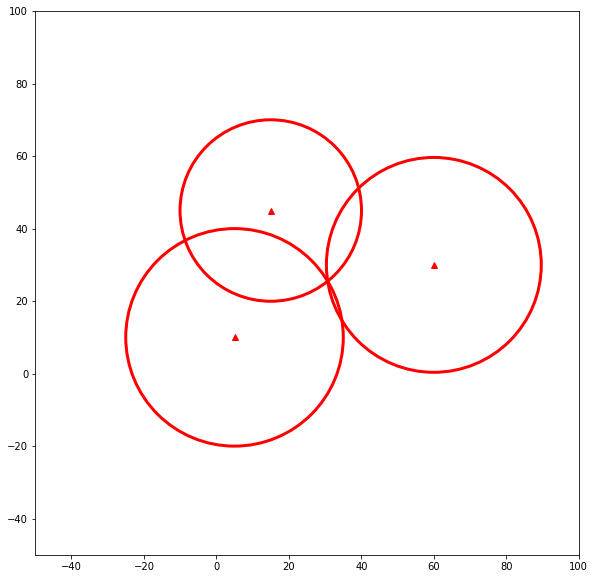

In [8]:
# Put your code here
plot(a1,b1,c1)

**What are the coordinates of the triangulated earthquake epicenter? (0.5 point)**

The triangulated earthquake epicenter is where the three circles intersect in the figure produced above. Please read from the figure the approximate coordinates of the triangulated earthquake epicenter. The coordinates don't have to be accurate. It is okay as long as they are within 10 km uncertainty of the true values. 

**Please write down below the coordinates of the triangulated earthquake epicenter.**

$(x_s,y_s) = (30.7,25.5)$

**Add and commit the file to your repository once you've done with Part 3. (1 pts)**

---
## Part 4: Inverse problem: Locate the earthquake epicenter using the measurements of S-P differential travel times at three different station locations (15 pts)

The inverse problem of locating the earthquake is the "inverse" of the forward problem described in Part 2. The model parameters, $x_s$ and $y_s$ (the Euclidean coordinates of the earthquake epicenter) can be used to perform forward modeling, i.e., to calculate (or to predict) the S-P differential travel times that can be observed and measured at all three stations, $\mathbf{\delta t}^{obs}$. In the inverse problem, we only have the observed S-P differential travel time $\mathbf{\delta t}^{obs}$ available, and we need to determine the model parameters ($x_s$ and $y_s$) that produce the observations $\mathbf{\delta t}^{obs}$. Because we are looking for the best (or optimal) model that matches the observations (data), this leads us to minimize an objective function, the misfit between the predicted and the observed S-P differential travel times, $\mathbf{\delta t}^{predict}$ and $\mathbf{\delta t}^{obs}$. The objective function is defined as the summation of the L2 norm of the misifits between the predicted and observed S-P differential travel times at all three stations.

\begin{equation*}
\chi = ||\mathbf{\delta t}^{predict} - \mathbf{\delta t}^{obs}||^2,
\quad\quad \text{Equation (2)}
\end{equation*}

For a small array of three seismic stations:

\begin{equation*}
\chi = \sum_{i=1}^{3} ({\delta t_i}^{predict} - {\delta t_i}^{obs})^2,
\quad\quad \text{Equation (3)}
\end{equation*}

$\mathbf{\delta t}^{predict}$ is determined by the model parameters, earthquake epicenter location $x_s$ and $y_s$. 


### Part 4.1: Use grid search method to find the optimal earthquake epicenter location by seaching for the minimum of the objective function (5 pts).

Grid Search method can be thought of as an exhaustive search method in gridded model space for selecting the optimal model parameters, in this case the coordinates of the earthquake epicenter ($x_s$ and $y_s$), to predict the observations, $\mathbf{\delta t}^{obs}$. For the grid search of earthquake epicenter, you need to divide the map region (where the earthquake is potentially located) into evenly spaced grid. For each grid point, use its coordinates as cadidate model parameters to predict the S-P differential travel times at all the stations, $\mathbf{\delta t}^{predict}$, and then calcuate the objective function based on Equation 3. The corrdinates of the grid point that lead to a minimum of objective function are the optimal model parameters of earthquake epicenter location.

Lets' assume that we know that the earthquake epicenter is potentially located within a bounding box of $x_s \in [0, 100]$ and $y_s \in [0, 100]$. With the observed S-P travel times and station locations given in Part 3.2, please use grid search method to locate the earthquake epicenter. 

#### Part 4.1.1: Please write a function to calculate the objective function with the three station locations, S-P differential travel time observations, $V_p$ and $V_s$ provided in Part 3.2. (2 pts)

In [9]:
# Put your code here
xs = np.zeros((101,101))
to = [3.922,3.272,3.874]

def obj(xs,to,vs = 3.2, vp = 5.5):
    for i in range(len(xs)):
        for j in range(len(xs)):
            ans = (sandp(5,10,i,j)-to[0])**2
            ans2 = (sandp(15,45,i,j)-to[1])**2
            ans3 = (sandp(60,30,i,j)-to[2])**2
            tot = ans + ans2 + ans3

            xs[j][i] = tot
    return xs
        

obj(xs,to,vs = 3.2, vp = 5.5)
x_list = []
y_list = []
list = []
for i in range(len(xs)):
    for j in range(len(xs)):
        list.append(xs[j][i])
        x_list.append(i)
        y_list.append(j)
index = list.index(min(list))
print(x_list[index],y_list[index],min(list))

31 25 0.006440093200206759


#### Part 4.1.2:  Follow the steps below to implement grid search method, print and plot the results. (3 points) 

Step 1: Create evenly spaced grid points in the potential earthquake epicenter region of $x_s \in [0, 100]$ and $y_s \in [0, 100]$. The grid inverval can be set as 1 km in both x and y directions.

Step 2: Loop through all the grid points, calculate the predicted S-P differential travel times at all three stations, and then calculate the objective function at each grid point based on Equation 3.

Step 3: Search and print out the grid point location (i.e. x and y coordinates) where the objective function reaches minimum.

Step 4: Plot the color filled contour map of the objective function at levels of [0.1, 1, 5, 10, 20, 40, 80, 160, 320], and plot stations as triangle and three cricles, each of which has the station as the center and the station's epicentral distance as radius.

<a list of 8 text.Text objects>

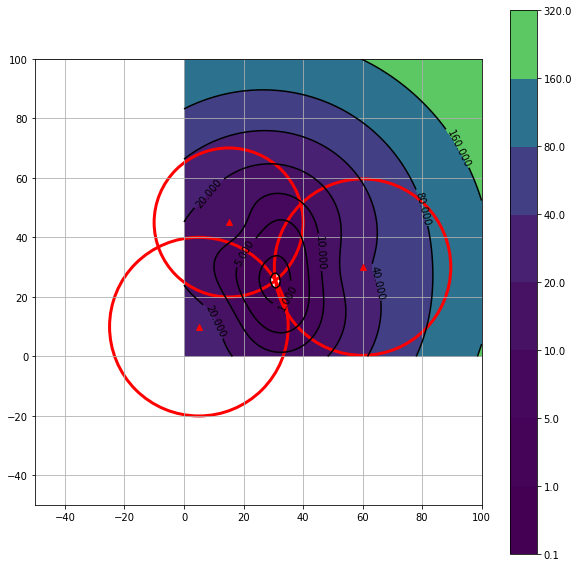

In [10]:
# Put your code here
plt.figure(figsize = (10,10))
seis1 = plt.Circle((5,10), a1, color = 'r', fill = False, linewidth = 3)
seis2 = plt.Circle((15,45),b1, color = 'r', fill = False, linewidth = 3)
seis3 = plt.Circle((60,30),c1, color = 'r', fill = False, linewidth = 3)
ax = plt.gca()
ax.cla()
plt.gca().set_aspect('equal')
    
ax.set_xlim((-50,100))
ax.set_ylim((-50,100))
    
ax.plot((5),(10), '^', color = 'r')
ax.plot((15),(45),'^', color = 'r')
ax.plot((60),(30),'^', color = 'r')
    
ax.add_artist(seis1)
ax.add_artist(seis2)
ax.add_artist(seis3)
ax.grid()



plt.contourf(xs,[0.1,1,5,10,20,40,80,160,320])
plt.colorbar()
cs = plt.contour(xs,[0.1,1,5,10,20,40,80,160,320], colors = 'k')
plt.clabel(cs)




### Part 4.2: Use Monte carlo method to find the optimal earthquake epicenter location by seaching for the minimum of the objective function (5 pts).

For the grid search method, the accuracy of the optimal model parameters found are limited by the grid intervals and the method itself is very computationally intensive. The alternative way to find the minimimum of the objective function is to use the Monte Carlo method. The Monte Carlo Method takes N sets of model parameters created by random number gernerator in the model space and evaluate and aggregate the the objective functions to find its minimum. The Monte Carlo method to some degree can alleviate the computational cost, especially for high dimensional models in which case the exhaustive search is computationally prohibited. 

Here is a crude version of the algorithm based on Monte Carlo method for minimizing the objective function related to locating earthquake epicenter:

Step 0: initialize the minimum of the objective function with a large value, for example, 1000.

Step 1: Generate a collection of 100 pairs of candidate model parameters ($x_s$ and $y_s$) according to a specific random number generator and associated sampling distribution (e.g., uniform distribution). 

Step 2: Find the minimum of the objective function for this collection. If the stop criterion is met, i.e., the minimum is less the threshhold 0.1, stop and return the model parameters ($x_s$ and $y_s$) at the minimum as the earthquake epicenter, otherwise, go back to Step 1 until the stop criterion is met.

You can reuse the objective function defined in Part 4.1.1.

In [ ]:
# Put your code here

---
### STOP
Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Finished Part 4", and push the changes to GitHub (1pts).

---

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.gle/P6F9grVeR1oNqUZ26" 
	width="800" 
	height="600" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

## Congrats, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" folder, find the appropriate submission link, and upload it there.